# Classification 

In [1]:
# Import some helper functions (please ignore this!)
from utils import * 

**Context:** We've just learned the framework underlying predictive models---their directed graphical model and MLE objective. We've instantiated this framework for regression---the task of predicting *real-valued* outputs from inputs. Now, we will provide another instantiation: classification. Classification focuses on predicting *categorical-valued* outputs from inputs. 

**Challenge:**

**Outline:**

In [68]:
# Import a bunch of libraries we'll be using below
import pandas as pd
import matplotlib.pylab as plt
import numpyro
import numpyro.distributions as D
import jax
import jax.numpy as jnp

# Load the data into a pandas dataframe
csv_fname = 'data/IHH-CTR-CGLF-classification.csv'
data = pd.read_csv(csv_fname, index_col='Patient ID')

# Print a random sample of patients, just to see what's in the data
data.sample(15, random_state=0)

,Age,Dose,Control-Before,Control-After
Patient ID,,,,
405,17.600859,0.764120,1,1
1190,5.332611,0.944742,1,1
1132,35.766937,0.796327,0,1
731,33.879105,0.802059,1,1
1754,26.795975,0.228325,1,1
1178,11.604771,0.185052,1,1
1533,3.343291,0.372828,1,1
1303,27.073309,0.497788,1,1
1857,77.514244,0.300860,0,0


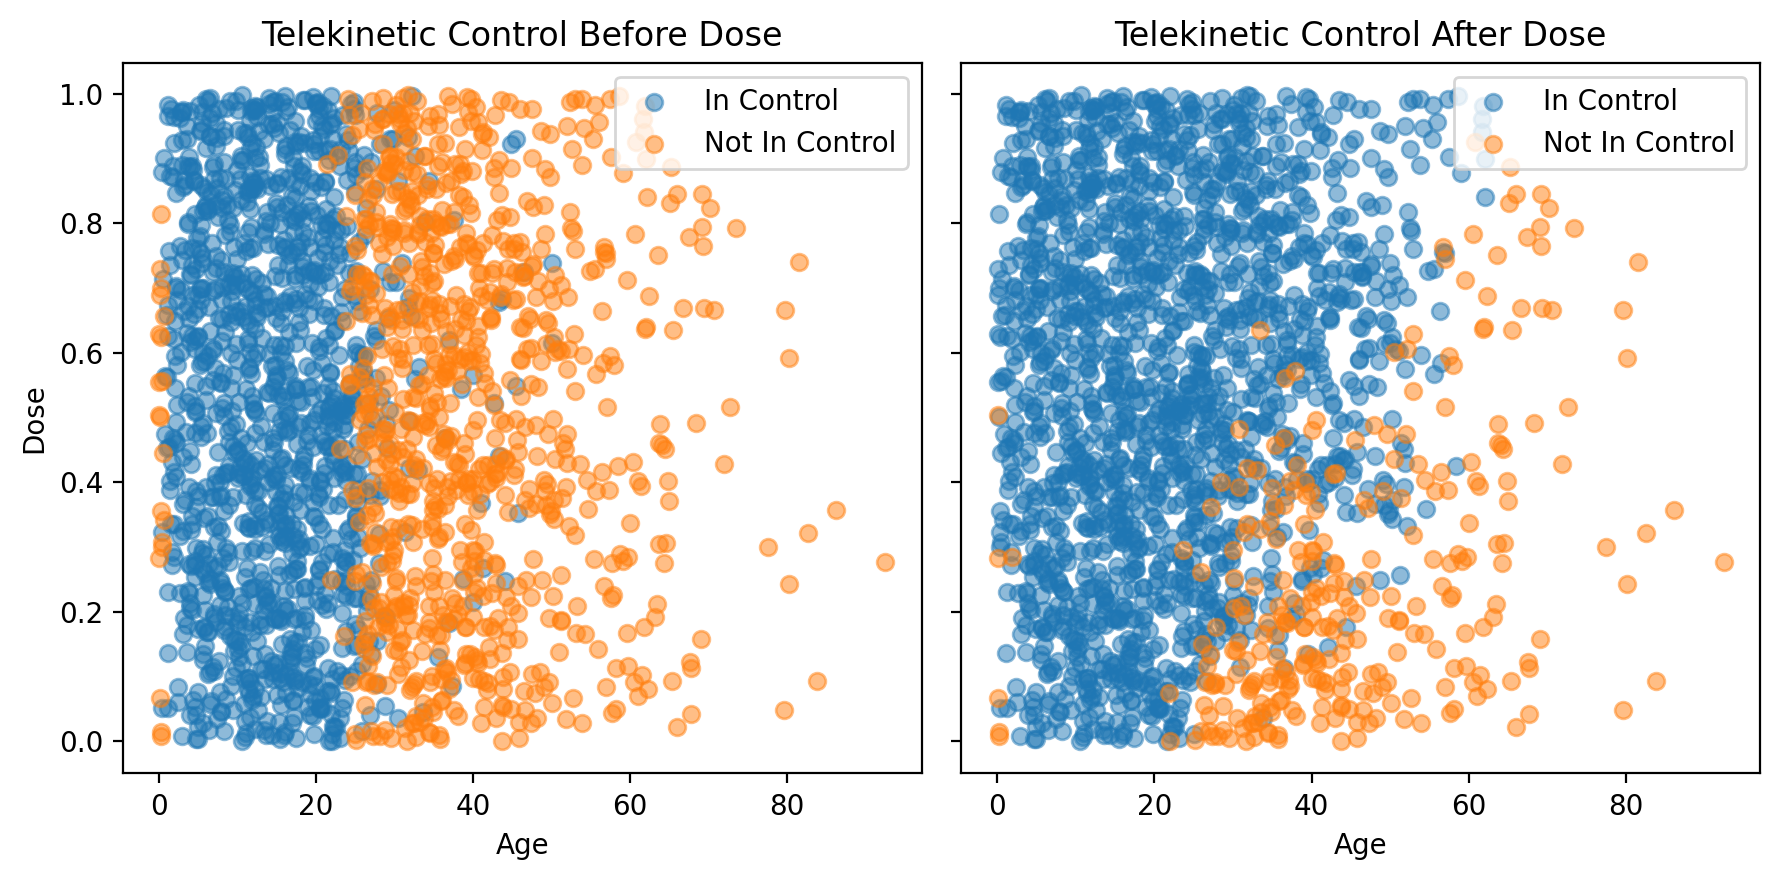

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), sharex=True, sharey=True)

in_control = (data['Control-Before'] == 1)
axes[0].scatter(data['Age'][in_control], data['Dose'][in_control], alpha=0.5, label='In Control')
axes[0].scatter(data['Age'][~in_control], data['Dose'][~in_control], alpha=0.5, label='Not In Control')

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Dose')
axes[0].set_title('Telekinetic Control Before Dose')
axes[0].legend()

in_control = (data['Control-After'] == 1)
axes[1].scatter(data['Age'][in_control], data['Dose'][in_control], alpha=0.5, label='In Control')
axes[1].scatter(data['Age'][~in_control], data['Dose'][~in_control], alpha=0.5, label='Not In Control')

axes[1].set_xlabel('Age')
axes[1].set_title('Telekinetic Control After Dose')
axes[1].legend()

plt.tight_layout()
plt.show()